# DS 5100 Group Project
Uyen Nguyen (gmd8sq)  
Andy Ortiz (eao7r)  
Lee Ann Johnson (lj6gd)  
JD Pinto (jp5ph)

### Data Acquisition

The original CDC BRFSS data download links are  
https://www.cdc.gov/brfss/annual_data/2016/files/LLCP2016XPT.zip  
https://www.cdc.gov/brfss/annual_data/2017/files/LLCP2017XPT.zip  
https://www.cdc.gov/brfss/annual_data/2018/files/LLCP2018XPT.zip  
https://www.cdc.gov/brfss/annual_data/2019/files/LLCP2019XPT.zip  
https://www.cdc.gov/brfss/annual_data/2020/files/LLCP2020XPT.zip

These links yield zipped files, which we decompressed into the original SAS format.  
These uncompressed SAS files are saved in our Google Drive.  
The following code will download these uncompressed SAS format files into this notebook.  
Takes about 3 minutes.

In [ ]:
!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1eZEJcs475GkYiZuA140-yApWJPPjMIvu' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1eZEJcs475GkYiZuA140-yApWJPPjMIvu" -O LLCP2016.XPT &&rm -rf /tmp/cookies.txt

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1et4-t9Nfz9kuv6eJ5lSmu5BeYh4LC1Ac' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1et4-t9Nfz9kuv6eJ5lSmu5BeYh4LC1Ac" -O LLCP2017.XPT &&rm -rf /tmp/cookies.txt

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1d7gaJ97Wikkpg0oKzu-TkoRCc6yjHWSX' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1d7gaJ97Wikkpg0oKzu-TkoRCc6yjHWSX" -O LLCP2018.XPT &&rm -rf /tmp/cookies.txt

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=16uXxriJalDLsVxpddV_CZ9EE7nPtvJV_' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=16uXxriJalDLsVxpddV_CZ9EE7nPtvJV_" -O LLCP2019.XPT &&rm -rf /tmp/cookies.txt

!wget -q --show-progress --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=1TDezb0zAXg9o7bdg9-PUwPIccck-B5hh' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=1TDezb0zAXg9o7bdg9-PUwPIccck-B5hh" -O LLCP2020.XPT &&rm -rf /tmp/cookies.txt

LLCP2016.XPT        100%[===================>]   1018M   162MB/s    in 6.4s    
LLCP2017.XPT        100%[===================>]   1.20G  23.9MB/s    in 18s     
LLCP2018.XPT        100%[===================>] 917.40M  36.3MB/s    in 18s     
LLCP2019.XPT        100%[===================>]   1.06G  45.7MB/s    in 25s     
LLCP2020.XPT        100%[===================>] 848.75M  28.4MB/s    in 20s     


### Data Preparation

The following code converts the SAS formatted files into CSV files.  
**This step takes about 20 minutes.**

In [ ]:
import pandas as pd

data = pd.read_sas("LLCP2016.XPT", format='xport')
data.to_csv("brfss2016.csv")
del(data)

data = pd.read_sas("LLCP2017.XPT", format='xport')
data.to_csv("brfss2017.csv")
del(data)

data = pd.read_sas("LLCP2018.XPT", format='xport')
data.to_csv("brfss2018.csv")
del(data)

data = pd.read_sas("LLCP2019.XPT", format='xport')
data.to_csv("brfss2019.csv")
del(data)

data = pd.read_sas("LLCP2020.XPT", format='xport')
data.to_csv("brfss2020.csv")
del(data)

(Optional) The following code deletes the no-longer-needed SAS files in order to free memory.

In [ ]:
import os
os.remove("LLCP2016.XPT") 
os.remove("LLCP2017.XPT")
os.remove("LLCP2018.XPT")
os.remove("LLCP2019.XPT")
os.remove("LLCP2020.XPT")

In order to test our hypothesis, 18 variables were chosen from the 279 columns.

Each year's data was reviewed for consistency of the variable fields.  
There were some differences between the years, requiring renaming of some variable fields before merging all of the data into one dataframe. 

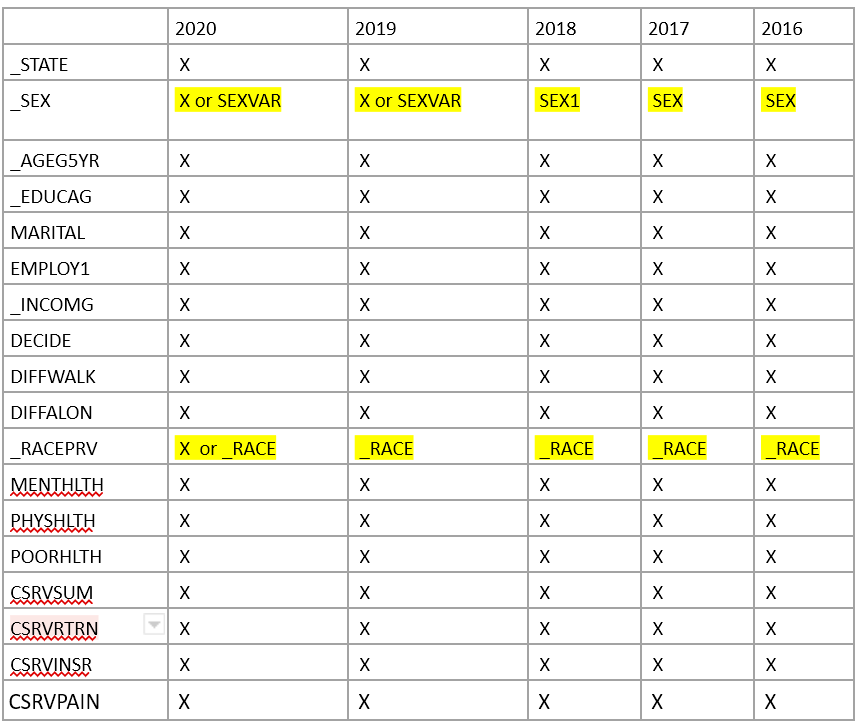

'_SEX' is not present before 2019; will convert 'SEXVAR' to 'SEX' for 2020, 2019  
'SEX1' to 'SEX' for 2018; 'SEX' stays unchanged for 2017, 2016  
'_RACEPRV' not present before 2020; will use '_RACE' for all years instead


The final list of 18 variables:  
_STATE  
SEX  
_AGEG5YR  
_EDUCAG  
MARITAL  
EMPLOY1  
_INCOMG  
DECIDE  
DIFFWALK  
DIFFALON  
_RACE 
MENTHLTH  
PHYSHLTH  
POORHLTH  
CSRVSUM  
CSRVRTRN  
CSRVINSR  
CSRVPAIN

Only the lung cancer survivors are selected, and since some of each year's data fields required renaming, each year is modified separately and then saved into an 18 column csv file.

In [ ]:
cancer_vars2016 = ['_STATE', 'SEX', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
data = pd.read_csv("brfss2016.csv")
data = data[(data["CNCRDIFF"] <= 3) & (data["CNCRTYP1"] == 24)]
lungCancer2016 = data[cancer_vars2016]
lungCancer2016.to_csv('lungCancer2016.csv')
del(data)

In [ ]:
cancer_vars2017 = ['_STATE', 'SEX', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
data = pd.read_csv("brfss2017.csv")
data = data[(data["CNCRDIFF"] <= 3) & (data["CNCRTYP1"] == 24)]
lungCancer2017 = data[cancer_vars2017]
lungCancer2017.to_csv('lungCancer2017.csv')
del(data)

In [ ]:
cancer_vars2018 = ['_STATE', 'SEX1', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
data = pd.read_csv("brfss2018.csv")
data = data[(data["CNCRDIFF"] <= 3) & (data["CNCRTYP1"] == 24)]
lungCancer2018 = data[cancer_vars2018]
lungCancer2018.rename(columns={'SEX1': 'SEX'}, inplace=True)
lungCancer2018.to_csv('lungCancer2018.csv')
del(data)

In [ ]:
cancer_vars2019 = ['_STATE', 'SEXVAR', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
data = pd.read_csv("brfss2019.csv")
data = data[(data["CNCRDIFF"] <= 3) & (data["CNCRTYP1"] == 24)]
lungCancer2019 = data[cancer_vars2019]
lungCancer2019.rename(columns={'SEXVAR': 'SEX'}, inplace=True)
lungCancer2019.to_csv('lungCancer2019.csv')
del(data)

In [ ]:
cancer_vars2020 = ['_STATE', 'SEXVAR', '_AGEG5YR', '_EDUCAG', 'MARITAL', 'EMPLOY1', '_INCOMG',
               'DECIDE', 'DIFFWALK', 'DIFFALON', '_RACE', 'MENTHLTH',
               'PHYSHLTH', 'POORHLTH','CSRVSUM', 'CSRVRTRN', 'CSRVINSR',
               'CSRVPAIN']
data = pd.read_csv("brfss2020.csv")
data = data[(data["CNCRDIFF"] <= 3) & (data["CNCRTYP1"] == 24)]
lungCancer2020= data[cancer_vars2020]
lungCancer2020.rename(columns={'SEXVAR': 'SEX'}, inplace=True)
lungCancer2020.to_csv('lungCancer2020.csv')
del(data)

The above 5 dataframes are combined into one dataframe.

In [ ]:
FiveYrLungCancer = lungCancer2016.append(lungCancer2017)
del(lungCancer2016)
del(lungCancer2017)
FiveYrLungCancer = FiveYrLungCancer.append(lungCancer2018)
del(lungCancer2018)
FiveYrLungCancer = FiveYrLungCancer.append(lungCancer2019)
del(lungCancer2019)
FiveYrLungCancer = FiveYrLungCancer.append(lungCancer2020)
del(lungCancer2020)

The dataframe of all lung cancer survivors is then saved into a CSV file.

In [ ]:
FiveYrLungCancer = FiveYrLungCancer.reset_index()
FiveYrLungCancer.to_csv('FiveYrLungCancer.csv')

This is a view of the final FiveYrLungCancer dataframe.

In [ ]:
FiveYrLungCancer.head()

,index,_STATE,SEX,_AGEG5YR,_EDUCAG,MARITAL,EMPLOY1,_INCOMG,DECIDE,DIFFWALK,DIFFALON,_RACE,MENTHLTH,PHYSHLTH,POORHLTH,CSRVSUM,CSRVRTRN,CSRVINSR,CSRVPAIN
0,121980,16.0,2.0,10.0,2.0,2.0,7.0,2.0,2.0,2.0,2.0,1.0,88.0,10.0,5.0,1.0,1.0,1.0,2.0
1,122094,16.0,2.0,10.0,3.0,3.0,7.0,1.0,2.0,1.0,2.0,1.0,4.0,30.0,30.0,1.0,1.0,1.0,1.0
2,122432,16.0,2.0,13.0,1.0,1.0,5.0,2.0,2.0,1.0,2.0,1.0,88.0,30.0,99.0,1.0,1.0,1.0,2.0
3,122614,16.0,2.0,13.0,1.0,3.0,8.0,1.0,1.0,1.0,1.0,1.0,21.0,30.0,15.0,1.0,1.0,1.0,2.0
4,122786,16.0,1.0,11.0,4.0,1.0,7.0,5.0,2.0,1.0,2.0,1.0,30.0,30.0,88.0,1.0,2.0,1.0,2.0


Prior to running any modeling procedures, the FiveYrLungCancer dataframe was examined for missing data.

(945, 20)


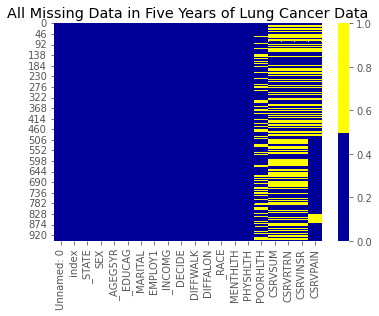

Unnamed: 0 - 0.0%
index - 0.0%
_STATE - 0.0%
SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACE - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 26.984%
CSRVSUM - 47.302%
CSRVRTRN - 47.302%
CSRVINSR - 47.302%
CSRVPAIN - 26.243%


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib
plt.style.use('ggplot')

# %matplotlib inline
matplotlib.rcParams['figure.figsize'] = (6,4)

pd.options.mode.chained_assignment = None
# # read in all data
data = pd.read_csv("FiveYrLungCancer.csv")
FiveYrLungCancer = data
print(FiveYrLungCancer.shape)
cols = FiveYrLungCancer.columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(FiveYrLungCancer[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('All Missing Data in Five Years of Lung Cancer Data')
plt.show()
for col in FiveYrLungCancer.columns:
    pct_missing = np.mean(FiveYrLungCancer[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

Essentially all of the variables that we planned to use as Predictor variables were complete.  

For 3 of the variables that we planned to use as Response variables, the missing data is shown below.

(458, 20)


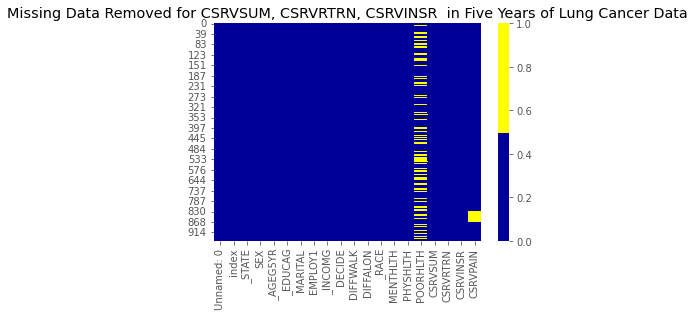

Unnamed: 0 - 0.0%
index - 0.0%
_STATE - 0.0%
SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACE - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 31.441%
CSRVSUM - 0.0%
CSRVRTRN - 0.0%
CSRVINSR - 0.0%
CSRVPAIN - 5.022%


In [ ]:
data = FiveYrLungCancer.loc[(~FiveYrLungCancer['CSRVSUM'].isnull())]
lungCancer_Ok_csrvsum = data[(data['CSRVSUM']<3) & (data['CSRVRTRN']<3) & (data['CSRVINSR']<3)]
print(lungCancer_Ok_csrvsum.shape)

cols = lungCancer_Ok_csrvsum.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer_Ok_csrvsum[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Missing Data Removed for CSRVSUM, CSRVRTRN, CSRVINSR  in Five Years of Lung Cancer Data')
plt.show()
for col in lungCancer_Ok_csrvsum.columns:
    pct_missing = np.mean(lungCancer_Ok_csrvsum[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

For the other Response variable, the missing data is shown below.

(689, 20)


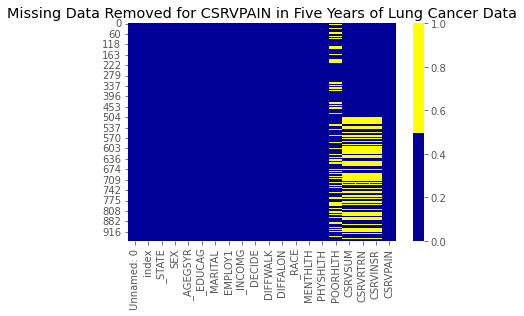

Unnamed: 0 - 0.0%
index - 0.0%
_STATE - 0.0%
SEX - 0.0%
_AGEG5YR - 0.0%
_EDUCAG - 0.0%
MARITAL - 0.0%
EMPLOY1 - 0.0%
_INCOMG - 0.0%
DECIDE - 0.0%
DIFFWALK - 0.0%
DIFFALON - 0.0%
_RACE - 0.0%
MENTHLTH - 0.0%
PHYSHLTH - 0.0%
POORHLTH - 29.608%
CSRVSUM - 32.366%
CSRVRTRN - 32.366%
CSRVINSR - 32.366%
CSRVPAIN - 0.0%


In [ ]:
data = FiveYrLungCancer.loc[(~FiveYrLungCancer['CSRVPAIN'].isnull())]
lungCancer_Ok_csrvpain = data[(data['CSRVPAIN']<3)]
print(lungCancer_Ok_csrvpain.shape)
cols = lungCancer_Ok_csrvpain.columns # first 30 columns
colours = ['#000099', '#ffff00'] # specify the colours - yellow is missing. blue is not missing.
sns.heatmap(lungCancer_Ok_csrvpain[cols].isnull(), cmap=sns.color_palette(colours))
plt.title('Missing Data Removed for CSRVPAIN in Five Years of Lung Cancer Data')
plt.show()
for col in lungCancer_Ok_csrvpain.columns:
    pct_missing = np.mean(lungCancer_Ok_csrvpain[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100,3)))

Since the missing data varied depending on which response variable was to be modeled, it was decided to leave this dataframe intact.  
The applicable missing data would be removed during the modeling process. 

### Data Exploration

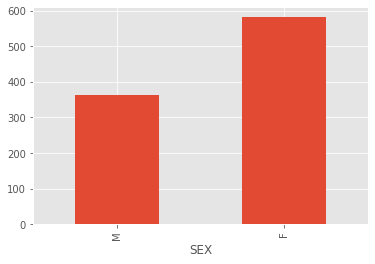

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['SEX']).count().plot.bar()
plt.xticks(ticks=np.arange(2),labels=('M','F'))
plt.show()

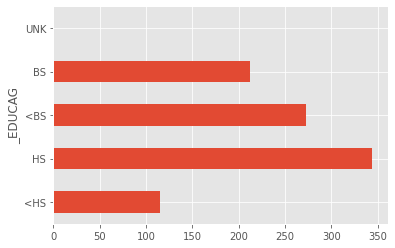

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['_EDUCAG']).count().plot.barh()
plt.yticks(ticks=np.arange(5),labels=('<HS','HS','<BS','BS','UNK'))
plt.show()

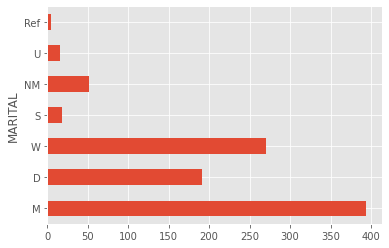

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['MARITAL']).count().plot.barh()
plt.yticks(ticks=np.arange(7),labels=('M','D','W','S','NM','U','Ref'))
plt.show()

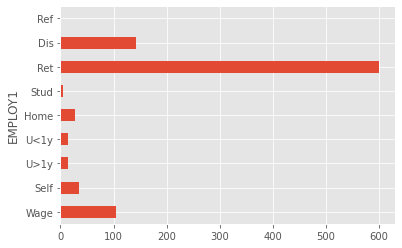

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['EMPLOY1']).count().plot.barh()
plt.yticks(ticks=np.arange(9),labels=('Wage','Self','U>1y','U<1y','Home','Stud','Ret','Dis','Ref'))
plt.show()

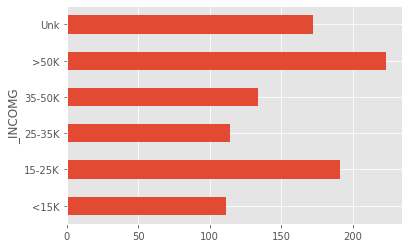

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['_INCOMG']).count().plot.barh()
plt.yticks(ticks=np.arange(6),labels=('<15K','15-25K','25-35K','35-50K','>50K','Unk'))
plt.show()

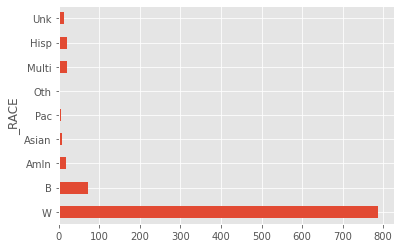

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['_RACE']).count().plot.barh()
plt.yticks(ticks=np.arange(9),labels=('W','B','AmIn','Asian','Pac','Oth','Multi','Hisp','Unk'))
plt.show()

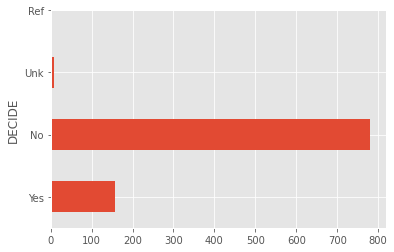

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['DECIDE']).count().plot.barh()
plt.yticks(ticks=np.arange(4),labels=('Yes','No','Unk','Ref'))
plt.show()

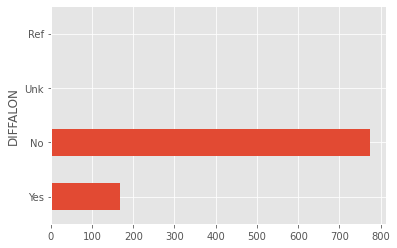

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['DIFFALON']).count().plot.barh()
plt.yticks(ticks=np.arange(4),labels=('Yes','No','Unk','Ref'))
plt.show()

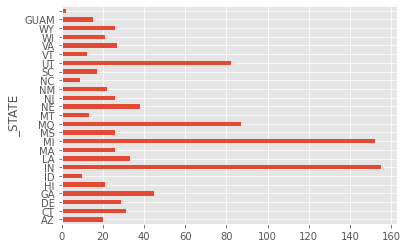

In [ ]:
FiveYrLungCancer['index'].groupby(FiveYrLungCancer['_STATE']).count().plot.barh()
plt.yticks(ticks=np.arange(25),labels=('AZ','CT','DE','GA','HI','ID','IN','LA','MA','MI','MS','MO','MT','NE','NJ','NM','NC','SC','UT','VT','VA','WI','WY','GUAM'))
plt.show()

### Modeling

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (confusion_matrix,accuracy_score)
import statsmodels.api as sm
import copy

Set up modeling for 3 of the response variables CSRVSUM, CSRVRTRN, CSRVINSR.

In [ ]:
data = copy.deepcopy(FiveYrLungCancer)
data = data[(data['CSRVSUM']<3) & (data['CSRVRTRN']<3) & (data['CSRVINSR']<3)]

Statsmodels functions must have the response variable between 0 and 1.

In [ ]:
data01 = copy.deepcopy(data)
data01 = data01.replace(1,0)
data01 = data01.replace(2,1)

#### Do a logistic regression on the binary response variable CSRVSUM

In [ ]:
X = data01[['SEX','_AGEG5YR','_EDUCAG','MARITAL']]
# X = data01[['_EDUCAG']]
y = data01['CSRVSUM']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7) 
print(y_train)
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)
log_reg = sm.Logit(y_train, X_train_with_constant).fit()
print(log_reg.summary())
yhat = log_reg.predict(X_test_with_constant)
prediction = list(map(round, yhat))
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, prediction))

864    0.0
793    0.0
851    0.0
107    0.0
386    0.0
      ... 
374    0.0
774    1.0
205    0.0
365    1.0
817    1.0
Name: CSRVSUM, Length: 137, dtype: float64
Optimization terminated successfully.
         Current function value: 0.646358
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                CSRVSUM   No. Observations:                  137
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                 0.05434
Time:                        17:23:59   Log-Likelihood:                -88.551
converged:                       True   LL-Null:                       -93.639
Covariance Type:            nonrobust   LLR p-value:                   0.03756
                 coef    std err          z      P>|z|      [0.025      0.975]
-----------------------

#### Do a logistic regression on the binary response variable CSRVRTRN

In [ ]:
X = data01[['SEX','_AGEG5YR','_EDUCAG','MARITAL']]
# X = data01[['_EDUCAG']]
y = data01['CSRVRTRN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7) 
print(y_train)
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)
log_reg = sm.Logit(y_train, X_train_with_constant).fit()
print(log_reg.summary())
yhat = log_reg.predict(X_test_with_constant)
prediction = list(map(round, yhat))
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, prediction))

397    0.0
794    0.0
576    1.0
498    0.0
224    1.0
      ... 
87     0.0
103    0.0
802    1.0
231    0.0
491    0.0
Name: CSRVRTRN, Length: 137, dtype: float64
Optimization terminated successfully.
         Current function value: 0.393746
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:               CSRVRTRN   No. Observations:                  137
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                 0.05277
Time:                        17:25:20   Log-Likelihood:                -53.943
converged:                       True   LL-Null:                       -56.948
Covariance Type:            nonrobust   LLR p-value:                    0.1984
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

#### Do a logistic regression on the binary response variable CSRVINSR

In [ ]:
X = data01[['SEX','_AGEG5YR','_EDUCAG','MARITAL']]
# X = data01[['_EDUCAG']]
y = data01['CSRVINSR']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7) 
print(y_train)
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)
log_reg = sm.Logit(y_train, X_train_with_constant).fit()
print(log_reg.summary())
yhat = log_reg.predict(X_test_with_constant)
prediction = list(map(round, yhat))
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, prediction))

265    0.0
21     0.0
747    0.0
419    0.0
744    0.0
      ... 
338    0.0
70     0.0
740    0.0
406    0.0
304    0.0
Name: CSRVINSR, Length: 137, dtype: float64
Optimization terminated successfully.
         Current function value: 0.215682
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               CSRVINSR   No. Observations:                  137
Model:                          Logit   Df Residuals:                      132
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                 0.03076
Time:                        17:26:21   Log-Likelihood:                -29.548
converged:                       True   LL-Null:                       -30.486
Covariance Type:            nonrobust   LLR p-value:                    0.7587
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------

#### Set up data and do logistic regression for binary response variable CSRVPAIN

In [ ]:
data = copy.deepcopy(FiveYrLungCancer)
data = data[(data['CSRVPAIN']<3)]
data01 = copy.deepcopy(data)
data01 = data01.replace(1,0)
data01 = data01.replace(2,1)
X = data01[['SEX','_AGEG5YR','_EDUCAG','MARITAL']]
# X = data01[['_EDUCAG']]
y = data01['CSRVPAIN']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.7) 
print(y_train)
X_train_with_constant = sm.add_constant(X_train)
X_test_with_constant = sm.add_constant(X_test)
log_reg = sm.Logit(y_train, X_train_with_constant).fit()
print(log_reg.summary())
yhat = log_reg.predict(X_test_with_constant)
prediction = list(map(round, yhat))
cm = confusion_matrix(y_test, prediction)
print ("Confusion Matrix : \n", cm)
print('Test accuracy = ', accuracy_score(y_test, prediction))

906    1.0
941    1.0
187    1.0
445    1.0
691    1.0
      ... 
114    1.0
449    1.0
932    1.0
656    0.0
529    1.0
Name: CSRVPAIN, Length: 206, dtype: float64
Optimization terminated successfully.
         Current function value: 0.423931
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:               CSRVPAIN   No. Observations:                  206
Model:                          Logit   Df Residuals:                      201
Method:                           MLE   Df Model:                            4
Date:                Fri, 03 Dec 2021   Pseudo R-squ.:                  0.1505
Time:                        18:11:27   Log-Likelihood:                -87.330
converged:                       True   LL-Null:                       -102.81
Covariance Type:            nonrobust   LLR p-value:                 3.133e-06
                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------